In [1]:
import matplotlib.pyplot as plt
from pprint import pprint

data = []
with open("histogram-1336855.out", "r") as f:
    for line in f:
        line = line.replace("\n", "")
        if line[0] != "[":
            if line[:7] == "Elapsed":
                data += [float(line.split("=")[1])]
                


In [2]:
len(data)

144

In [3]:
# split the list into evenly chuncks
data = [data[i:i + 8] for i in range(0, len(data), 8)]
pprint(data)

[[7.78e-05, 0.000207, 0.00039, 0.000773, 0.00113, 0.00139, 0.00237, 0.00198],
 [0.000152, 0.000433, 0.000587, 0.00094, 0.00105, 0.00141, 0.00173, 0.0241],
 [0.00101, 0.00121, 0.00132, 0.0016, 0.00222, 0.00294, 0.00395, 0.00748],
 [0.00738, 0.00398, 0.00222, 0.0016, 0.00152, 0.00239, 0.00258, 0.00253],
 [0.00749, 0.00409, 0.00242, 0.00176, 0.00192, 0.00245, 0.0294, 0.00292],
 [0.00875, 0.00508, 0.0033, 0.00284, 0.00294, 0.00302, 0.0116, 0.0163],
 [27.0, 16.1, 10.4, 5.73, 3.92, 3.3, 2.75, 2.32],
 [27.0, 16.6, 9.81, 5.31, 3.85, 3.31, 2.69, 2.11],
 [27.6, 16.2, 9.92, 5.45, 4.14, 3.37, 2.77, 2.49],
 [3.46e-05, 0.000181, 0.000214, 0.000467, 0.00116, 0.000825, 0.00101, 0.00743],
 [0.000105, 0.000246, 0.000351, 0.000555, 0.000713, 0.000994, 0.00136, 0.0102],
 [0.000526, 0.000792, 0.00106, 0.00123, 0.00158, 0.00205, 0.00271, 0.0116],
 [0.00392, 0.00256, 0.0014, 0.0014, 0.00137, 0.00163, 0.00157, 0.00746],
 [0.00403, 0.00236, 0.00133, 0.00156, 0.0015, 0.00156, 0.00164, 0.0112],
 [0.00421, 0.0026

Text(0.5, 1.0, 'Weak scaling')

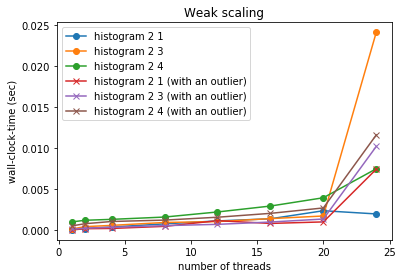

In [4]:
# weak scaling w/ and w/o an outlier
num_threads = [1, 2, 4, 8, 12, 16, 20, 24]
plt.plot(num_threads, data[0], 'o-', label="histogram 2 1")
plt.plot(num_threads, data[1], 'o-', label="histogram 2 3")
plt.plot(num_threads, data[2], 'o-', label="histogram 2 4")
plt.plot(num_threads, data[9], 'x-', label="histogram 2 1 (with an outlier)")
plt.plot(num_threads, data[10], 'x-', label="histogram 2 3 (with an outlier)")
plt.plot(num_threads, data[11], 'x-', label="histogram 2 4 (with an outlier)")
plt.legend()
plt.xlabel("number of threads")
plt.ylabel("wall-clock-time (sec)")
plt.title("Weak scaling")

## Comment for weak scaling w/ and w/o an outlier (the figure above)
In this regime of small problem size, we expect the run time to be constant. But, we see that it grows a bit with respect to the number of threads. This indicates a constant communication cost associated with each thread.

Text(0.5, 1.0, 'Strong scaling (smaller input array size)')

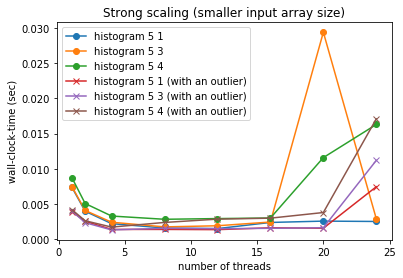

In [5]:
# strong scaling w/ and w/o an outlier
num_threads = [1, 2, 4, 8, 12, 16, 20, 24]
plt.plot(num_threads, data[3], 'o-', label="histogram 5 1")
plt.plot(num_threads, data[4], 'o-', label="histogram 5 3")
plt.plot(num_threads, data[5], 'o-', label="histogram 5 4")
plt.plot(num_threads, data[12], 'x-', label="histogram 5 1 (with an outlier)")
plt.plot(num_threads, data[13], 'x-', label="histogram 5 3 (with an outlier)")
plt.plot(num_threads, data[14], 'x-', label="histogram 5 4 (with an outlier)")
plt.legend()
plt.xlabel("number of threads")
plt.ylabel("wall-clock-time (sec)")
plt.title("Strong scaling (smaller input array size)")

## Comment for strong scaling w/ and w/o an outlier (the figure above)
When the problem size gets larger, while the number of threads also grows with respect to problem size, we see that the run time is basically constant. However, we do see that when the number of threads gets larger, there is an increase of run time. We can explain this as there are idle threads (input data is too few, the threads are waiting for the data) and there is too much overhead.

Text(0.5, 1.0, 'Strong scaling (larger input array size)')

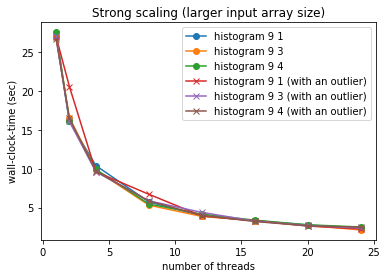

In [6]:
# strong scaling w/ and w/o an outlier
num_threads = [1, 2, 4, 8, 12, 16, 20, 24]
plt.plot(num_threads, data[6], 'o-', label="histogram 9 1")
plt.plot(num_threads, data[7], 'o-', label="histogram 9 3")
plt.plot(num_threads, data[8], 'o-', label="histogram 9 4")
plt.plot(num_threads, data[15], 'x-', label="histogram 9 1 (with an outlier)")
plt.plot(num_threads, data[16], 'x-', label="histogram 9 3 (with an outlier)")
plt.plot(num_threads, data[17], 'x-', label="histogram 9 4 (with an outlier)")
plt.legend()
plt.xlabel("number of threads")
plt.ylabel("wall-clock-time (sec)")
plt.title("Strong scaling (larger input array size)")

## Comment for strong scaling w/ and w/o an outlier, but larger problem size (the figure above)
When the data is intensive, we can see a (beautiful) scaling behavior. One obtain a continuous decrease in run time, when both the number of threads and data is increasing. Still we see some smooth out in larger threads, this can be explained by the Amdahl's law, where there exists sequential codes that must not be executed in parallel.